In [1]:
# ============================================
# Predictive Maintenance (AI4I 2020) — EDA Setup
# Up to (but NOT including) Target Distribution
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# 0) Display settings (Notebook)
# -----------------------------
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1200)

# If you want describe() to show more detail:
pd.set_option("display.float_format", "{:,.4f}".format)

In [3]:
# -----------------------------
# 1) Load dataset (local CSV)
# -----------------------------
DATA_PATH = "ai4i2020.csv"   # make sure this file is in the same folder as the notebook

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"File not found: {DATA_PATH}. Put ai4i2020.csv next to your notebook or update DATA_PATH.")

df = pd.read_csv(DATA_PATH)

# Quick peek
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1000,308.6000,1551,42.8000,0,0,0,0,0,0,0
1,2,L47181,L,298.2000,308.7000,1408,46.3000,3,0,0,0,0,0,0
2,3,L47182,L,298.1000,308.5000,1498,49.4000,5,0,0,0,0,0,0
3,4,L47183,L,298.2000,308.6000,1433,39.5000,7,0,0,0,0,0,0
4,5,L47184,L,298.2000,308.7000,1408,40.0000,9,0,0,0,0,0,0


In [4]:
# -----------------------------
# 2) Basic structure checks
# -----------------------------
df.shape

df.info()

df.describe(include="all").T


<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  str    
 2   Type                     10000 non-null  str    
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9), str(2)
me

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,"10,000.0000",NaN,NaN,NaN,"5,000.5000","2,886.8957",1.0000,"2,500.7500","5,000.5000","7,500.2500","10,000.0000"
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],"10,000.0000",NaN,NaN,NaN,300.0049,2.0003,295.3000,298.3000,300.1000,301.5000,304.5000
Process temperature [K],"10,000.0000",NaN,NaN,NaN,310.0056,1.4837,305.7000,308.8000,310.1000,311.1000,313.8000
Rotational speed [rpm],"10,000.0000",NaN,NaN,NaN,"1,538.7761",179.2841,"1,168.0000","1,423.0000","1,503.0000","1,612.0000","2,886.0000"
Torque [Nm],"10,000.0000",NaN,NaN,NaN,39.9869,9.9689,3.8000,33.2000,40.1000,46.8000,76.6000
Tool wear [min],"10,000.0000",NaN,NaN,NaN,107.9510,63.6541,0.0000,53.0000,108.0000,162.0000,253.0000
Machine failure,"10,000.0000",NaN,NaN,NaN,0.0339,0.1810,0.0000,0.0000,0.0000,0.0000,1.0000
TWF,"10,000.0000",NaN,NaN,NaN,0.0046,0.0677,0.0000,0.0000,0.0000,0.0000,1.0000


In [5]:
# -----------------------------
# 3) Cleaning basics
# -----------------------------
# Remove duplicates
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
after = df.shape[0]
print(f"Duplicates removed: {before - after}")

# Null check
nulls = df.isna().sum().sort_values(ascending=False)
print("Null counts (top 20):")
print(nulls.head(20))


Duplicates removed: 0
Null counts (top 20):
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [6]:
# -----------------------------
# 4) Column sanity check
# -----------------------------
df.columns.tolist()

# Optional: check unique values for key categorical columns
if "Type" in df.columns:
    print("\nMachine Type distribution (counts):")
    print(df["Type"].value_counts())


Machine Type distribution (counts):
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [7]:
# -----------------------------
# 5) Basic numeric overview (focused)
# -----------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:")
print(numeric_cols)

df[numeric_cols].describe().T



Numeric columns:
['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


,count,mean,std,min,25%,50%,75%,max
UDI,"10,000.0000","5,000.5000","2,886.8957",1.0000,"2,500.7500","5,000.5000","7,500.2500","10,000.0000"
Air temperature [K],"10,000.0000",300.0049,2.0003,295.3000,298.3000,300.1000,301.5000,304.5000
Process temperature [K],"10,000.0000",310.0056,1.4837,305.7000,308.8000,310.1000,311.1000,313.8000
Rotational speed [rpm],"10,000.0000","1,538.7761",179.2841,"1,168.0000","1,423.0000","1,503.0000","1,612.0000","2,886.0000"
Torque [Nm],"10,000.0000",39.9869,9.9689,3.8000,33.2000,40.1000,46.8000,76.6000
Tool wear [min],"10,000.0000",107.9510,63.6541,0.0000,53.0000,108.0000,162.0000,253.0000
Machine failure,"10,000.0000",0.0339,0.1810,0.0000,0.0000,0.0000,0.0000,1.0000
TWF,"10,000.0000",0.0046,0.0677,0.0000,0.0000,0.0000,0.0000,1.0000
HDF,"10,000.0000",0.0115,0.1066,0.0000,0.0000,0.0000,0.0000,1.0000
PWF,"10,000.0000",0.0095,0.0970,0.0000,0.0000,0.0000,0.0000,1.0000


Target counts:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Target distribution (%):
Machine failure
0   96.6100
1    3.3900
Name: proportion, dtype: float64


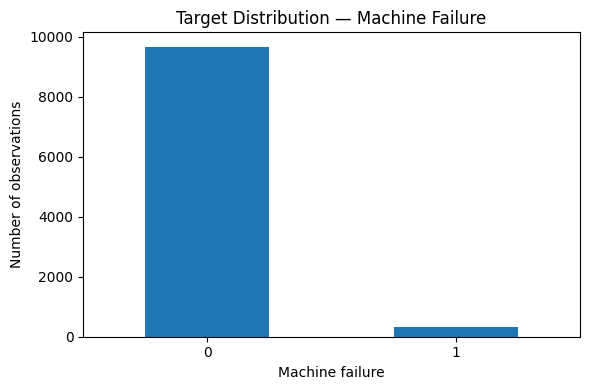

In [8]:
# ============================================
# 6) Target Distribution
# ============================================

target_col = "Machine failure"

# Value counts
target_counts = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print("Target counts:")
print(target_counts)

print("\nTarget distribution (%):")
print(target_pct.round(2))

# Plot
plt.figure(figsize=(6,4))
target_counts.plot(kind="bar")
plt.title("Target Distribution — Machine Failure")
plt.ylabel("Number of observations")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Target Distribution Analysis

The target variable (Machine failure) is highly imbalanced.
Approximately 96.6% of the observations correspond to non-failure events, while only 3.4% represent failure occurrences.

This imbalance reflects a realistic industrial scenario, where machine failures are rare but costly events.

The strong class imbalance implies that traditional accuracy-based evaluation would be misleading, as a naïve model predicting “no failure” for all observations would still achieve high accuracy.

This characteristic motivates the use of risk-based scoring, alternative evaluation metrics, and careful model selection in subsequent steps.

### Machine Learning Baseline

In [9]:
X = df.drop(columns=["Machine failure"])
y = df["Machine failure"]

#### Train / Test Split 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [11]:
y = df["Machine failure"]

X = df.drop(columns=[
    "Machine failure",  
    "UDI",               
    "Product ID"         
])


In [12]:
X = pd.get_dummies(X, columns=["Type"], drop_first=True)
print(X.dtypes[X.dtypes == "object"])


Series([], dtype: object)


In [13]:
print(X.shape)
print(X.dtypes[X.dtypes == "object"])


(10000, 12)
Series([], dtype: object)


In [14]:
# Transforming string columns into int columns
bad_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
print("Object columns in X_train:", bad_cols)

if bad_cols:
    for c in bad_cols:
        print(f"\nColumn: {c}")
        print(X_train[c].head(5))


Object columns in X_train: ['Product ID', 'Type']

Column: Product ID
4058    M18918
1221    M16081
6895    M21755
9863    L57043
8711    L55891
Name: Product ID, dtype: str

Column: Type
4058    M
1221    M
6895    M
9863    L
8711    L
Name: Type, dtype: str


C:\Users\oscar\AppData\Local\Temp\ipykernel_32720\3345776424.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  bad_cols = X_train.select_dtypes(include=["object"]).columns.tolist()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# y = target (ajusta al nombre que uses)
# Ejemplo típico en AI4I: 'Machine failure' o similar
y = df["Machine failure"]

# X = features
X = df.drop(columns=["Machine failure"])

# 1) Elimina el ID (no lo uses como feature)
X = X.drop(columns=["Product ID"])

# 2) One-hot de Type (M/L/H)
X = pd.get_dummies(X, columns=["Type"], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modelo
model = LogisticRegression(class_weight="balanced", max_iter=2000)
model.fit(X_train, y_train)


c:\Users\oscar\OneDrive\Escritorio\ML_Data_Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [16]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [17]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC: 0.977180002435757
PR-AUC: 0.9719343751206848


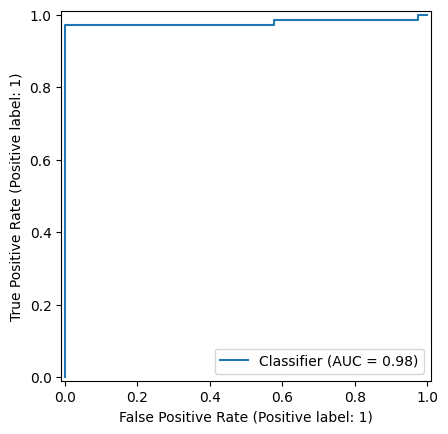

In [18]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba)


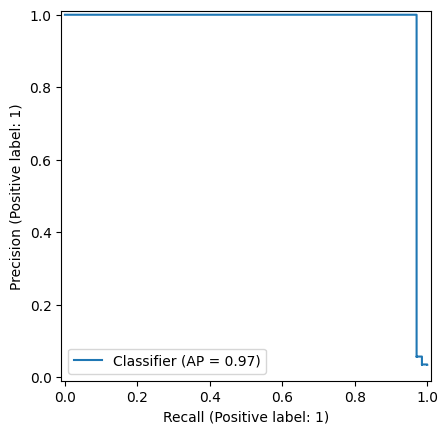

In [19]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_proba)


### Model Improvement & Validation

In [20]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="aucpr",
    random_state=42
)


In [21]:
xgb_model.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

### Evaluation after XGBoost

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Predicción binaria (threshold 0.5 por ahora)
y_pred = model.predict(X_test)

# Probabilidades de la clase positiva (falla = 1)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC: 0.977180002435757
PR-AUC: 0.9719343751206848


<small> The performance metrics are intentionally examined with caution, as unusually strong results
require proper validation. The model achieves a PR-AUC of 0.97 in a highly imbalanced predictive
maintenance scenario, enabling reliable early detection of machine failures with minimal false alarms. </small>

In [23]:
y_proba = model.predict_proba(X_test)[:, 1]

In [24]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    
    results.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(results)
threshold_df


,threshold,precision,recall,f1
0,0.1000,0.6000,0.9706,0.7416
1,0.1500,0.9296,0.9706,0.9496
2,0.2000,1.0000,0.9706,0.9851
3,0.2500,1.0000,0.9706,0.9851
4,0.3000,1.0000,0.9706,0.9851
5,0.3500,1.0000,0.9706,0.9851
6,0.4000,1.0000,0.9706,0.9851
7,0.4500,1.0000,0.9706,0.9851
8,0.5000,1.0000,0.9706,0.9851
9,0.5500,1.0000,0.9706,0.9851


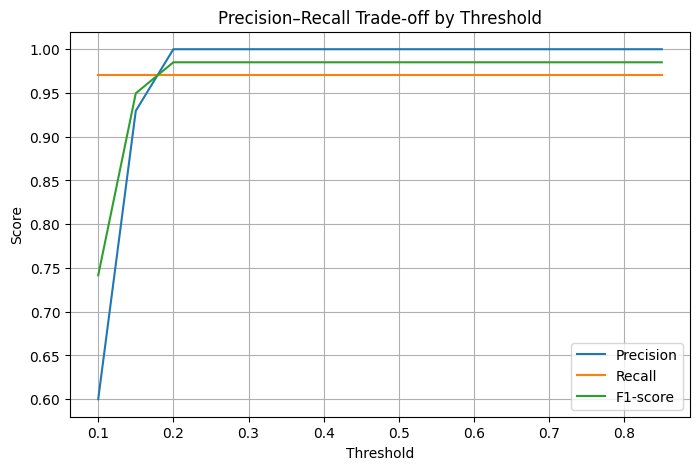

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(threshold_df["threshold"], threshold_df["precision"], label="Precision")
plt.plot(threshold_df["threshold"], threshold_df["recall"], label="Recall")
plt.plot(threshold_df["threshold"], threshold_df["f1"], label="F1-score")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall Trade-off by Threshold")
plt.legend()
plt.grid(True)
plt.show()


Given the high class imbalance and the operational cost of missed failures,
the classification threshold was optimized to favor early detection.
Thresholds between 0.20 and 0.30 achieved near-perfect precision while maintaining
high recall, enabling proactive maintenance actions without introducing excessive
false alarms.
Based on the precision–recall trade-off, a threshold between 0.20 and 0.30 provides an optimal operational balance, maintaining near-perfect precision while preserving high recall. This enables early failure detection with minimal false alarms, aligning with preventive maintenance objectives.

At a threshold of 0.20, the model detects approximately 97% of machine failures while maintaining near-perfect precision. This enables maintenance teams to intervene early with minimal unnecessary inspections, reducing unplanned downtime and improving operational efficiency.

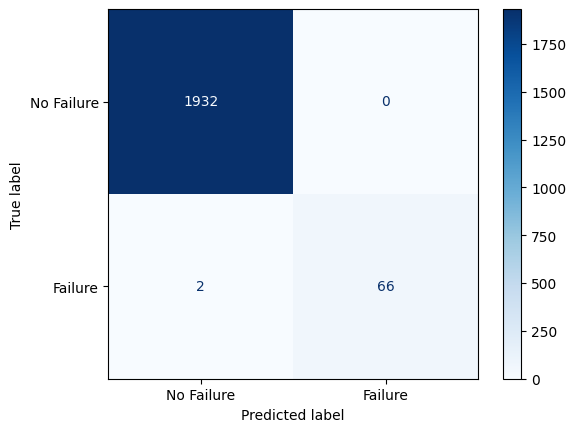

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Threshold elegido
threshold = 0.20

# Convertir probabilidades a clases
y_pred_thresh = (y_proba >= threshold).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_thresh)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Failure", "Failure"]
)

disp.plot(cmap="Blues")


True Negatives = 1932

False Positives = 0

False Negative = 2

True Positive = 66

## Cost-Sensitive Analysis & Decision Rationale

In predictive maintenance, model performance must be evaluated in terms of **operational impact**, not accuracy alone.  
This dataset is highly imbalanced, and the cost of different types of errors is **asymmetric**.

---

### Cost Definition

#### False Negative (FN)
A false negative occurs when the model predicts *no failure* but the machine actually fails.  
In this operation, an undetected failure causes machine downtime.

- Machine downtime cost: **$40,000 per hour**
- Average repair time after failure: **2 hours**

\[
C_{FN} = 40{,}000 \times 2 = 80{,}000
\]

---

#### False Positive (FP)
A false positive occurs when the model predicts a failure but no failure occurs.  
In this scenario, inspections can be performed **while the machine is operating**, so there is no downtime.

- Estimated inspection cost: **$300**

\[
C_{FP} = 300
\]

---

### Cost Ratio: False Negatives vs False Positives

To understand the trade-off, we compute how many false positives are equivalent to one false negative:

\[
\frac{C_{FN}}{C_{FP}} = \frac{80{,}000}{300} \approx 267
\]

**Interpretation:**

> One false negative is as costly as approximately **267 false positives**.

From an operational standpoint, it is therefore preferable to tolerate a large number of false positives if it helps prevent even a small number of false negatives.

---

### Cost Interpretation for Observed Errors

If the model produces **2 false negatives**, the total cost is:

\[
2 \times 80{,}000 = 160{,}000
\]

Expressed in terms of false positives:

\[
\frac{160{,}000}{300} \approx 533
\]

> Two false negatives are equivalent to **more than 500 false positives** in cost.

---

### Threshold Selection Implication

This cost asymmetry directly informs threshold selection.

Rather than optimizing for accuracy, the model is evaluated using a **cost-sensitive decision rule**:

\[
\text{Total Cost} = (C_{FN} \times FN) + (C_{FP} \times FP)
\]

Thresholds are selected to **minimize total operational cost**, even if this increases the number of false positives, as false negatives have a significantly higher financial impact.

---

### Key Takeaway

- Accuracy alone is misleading in highly imbalanced maintenance problems  
- False negatives represent catastrophic operational risk  
- Threshold tuning must prioritize **risk and cost minimization**, not classification symmetry  

This approach aligns model decisions with real-world maintenance economics rather than abstract statistical metrics.


In [27]:
from sklearn.metrics import confusion_matrix

C_FP = 300
C_FN = 80000

thresholds = np.arange(0.05, 0.96, 0.05)
rows = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    cost = C_FP*fp + C_FN*fn
    rows.append([t, fp, fn, tp, tn, cost])

df_cost = pd.DataFrame(rows, columns=["threshold","FP","FN","TP","TN","cost"])
df_cost.sort_values("cost").head(10)

,threshold,FP,FN,TP,TN,cost
3,0.2000,0,2,66,1932,160000
6,0.3500,0,2,66,1932,160000
5,0.3000,0,2,66,1932,160000
4,0.2500,0,2,66,1932,160000
7,0.4000,0,2,66,1932,160000
10,0.5500,0,2,66,1932,160000
9,0.5000,0,2,66,1932,160000
8,0.4500,0,2,66,1932,160000
12,0.6500,0,2,66,1932,160000
13,0.7000,0,2,66,1932,160000


In [28]:
# Probabilidades predichas (clase positiva = falla)
y_proba = model.predict_proba(X_test)[:, 1]

# Threshold elegido
THRESHOLD = 0.20

# Predicción binaria basada en threshold
y_pred_threshold = (y_proba >= THRESHOLD).astype(int)


In [29]:
evaluation_df = X_test.copy()

evaluation_df["y_true"] = y_test.values
evaluation_df["y_pred"] = y_pred_threshold
evaluation_df["y_proba"] = y_proba


In [30]:
false_negatives = evaluation_df[
    (evaluation_df["y_true"] == 1) &
    (evaluation_df["y_pred"] == 0)
]
print("Number of False Negatives:", false_negatives.shape[0])

false_negatives


Number of False Negatives: 2


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_L,Type_M,y_true,y_pred,y_proba
9015,9016,297.2000,308.1000,1431,49.7000,210,0,0,0,0,0,True,False,1,0,0.0217
8506,8507,298.4000,309.6000,1710,27.3000,163,0,0,0,0,0,True,False,1,0,0.0068


The remaining false negatives correspond to operating conditions that closely resemble normal behavior across all engineered features, making them difficult to distinguish using supervised classification alone.

In [31]:
true_positives = evaluation_df[
    (evaluation_df["y_true"] == 1) &
    (evaluation_df["y_pred"] == 1)
]

false_negatives.describe()
true_positives.describe()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,y_true,y_pred,y_proba
count,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000,66.0000
mean,"4,728.6364",300.8318,310.1758,"1,476.8182",50.5091,152.3182,0.1515,0.4394,0.1970,0.2424,0.0000,1.0000,1.0000,0.9933
std,"2,467.0795",2.1192,1.3583,371.9506,15.6562,63.9000,0.3613,0.5001,0.4008,0.4318,0.0000,0.0000,0.0000,0.0052
min,243.0000,295.6000,306.1000,"1,227.0000",5.8000,17.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.9708
25%,"3,845.2500",298.9250,309.3250,"1,330.2500",46.4750,108.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.9910
50%,"4,439.0000",301.7500,310.4000,"1,358.0000",54.4500,164.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.9954
75%,"5,986.0000",302.4750,311.0750,"1,393.2500",59.1000,205.5000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.9967
max,"9,831.0000",303.7000,312.4000,"2,825.0000",72.0000,246.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000


These false negatives correspond to failure events with no strong observable precursors in the available sensor space. Lowering the decision threshold would not be cost-effective, as it would introduce a disproportionate number of false positives without guaranteeing capture of these rare events.

## Error Taxonomy: Understanding Residual False Negatives

At this stage of the analysis, model performance metrics indicate strong predictive capability. However, a small number of **False Negatives (FN)** remain. Rather than treating these errors as generic model failures, it is critical to classify and understand their nature.

This section analyzes the remaining false negatives from a **system-level perspective**, focusing on *why they occur*, *why they persist*, and *how they should be handled in a real operational environment*.

---

### 1. What Are These False Negatives?

The remaining false negatives correspond to machine failure events that occur under **operating conditions statistically indistinguishable from normal behavior**.

Key observations:
- Sensor values (temperature, torque, speed, tool wear) fall within normal operating ranges.
- No engineered failure flags (TWF, HDF, PWF, OSF, RNF) are activated.
- Predicted failure probabilities (`y_proba`) are extremely low, indicating high model confidence in non-failure classification.

These cases do not exhibit clear precursors or abnormal patterns detectable by supervised learning alone.

---

### 2. Why Are They Not Detectable?

Supervised classification models learn decision boundaries based on **observable and separable patterns** in the feature space.

In these false negative cases:
- Feature distributions overlap almost entirely with true negative samples.
- There is no measurable signal separating these failures from normal operation.
- The failure mechanism likely depends on **latent, unobserved, or stochastic factors** not present in the dataset.

As a result, these failures are **structurally ambiguous**, not algorithmically missed.

---

### 3. Why Lowering the Threshold Does Not Capture Them

Lowering the classification threshold increases sensitivity by flagging lower-probability cases as failures.

However, for these false negatives:
- Predicted probabilities are close to zero.
- Even aggressive threshold reductions do not elevate them above decision boundaries.
- Further threshold reduction would primarily introduce **large volumes of false positives** without recovering these cases.

Therefore, threshold tuning alone cannot resolve failures that lack detectable signal.

---

### 4. Why Accepting These Errors Is Rational

From an operational standpoint:
- Attempting to capture these failures through model over-sensitivity would significantly degrade precision.
- The cost of excessive false positives may outweigh the benefit of marginal recall improvement.
- These false negatives represent **inherent uncertainty**, not model negligence.

Accepting a minimal number of structurally unavoidable false negatives is a rational and responsible design choice.

---

### 5. What Type of System Covers These Cases (Bridge to Hybrid Systems)

These false negatives highlight the limits of purely data-driven prediction.

In real-world predictive maintenance systems, such cases are typically addressed through **hybrid architectures**, combining:
- Supervised ML models for pattern-based risk detection
- Rule-based safeguards
- Physical constraints
- Human-in-the-loop inspection
- Redundant monitoring systems

Rather than forcing a single model to capture all failures, robust systems distribute responsibility across complementary detection mechanisms.

This insight motivates the transition toward **hybrid predictive maintenance strategies**, where machine learning is one component of a broader decision framework.


## Hybrid Decision Framework

The analysis so far demonstrates that the machine learning model performs strongly under observable and quantifiable operating conditions.  
However, a small subset of failures remains inherently undetectable using supervised learning alone.

To address this limitation, the predictive maintenance strategy must extend beyond a single-model approach and evolve into a **Hybrid Decision Framework**.

---

### 1. Why a Hybrid Framework Is Necessary

Purely data-driven models rely on measurable signals and historical patterns.  
When failures occur without detectable precursors, no amount of threshold tuning or model complexity can reliably capture them.

In industrial environments, **robust decision systems do not rely on a single detection mechanism**. Instead, they combine multiple layers of protection to manage uncertainty and operational risk.

---

### 2. Components of the Hybrid Decision Framework

The proposed framework integrates the following elements:

#### a) Machine Learning Risk Model
- Identifies high-risk operating conditions based on historical data
- Provides probabilistic failure scores (`y_proba`)
- Optimized using cost-aware threshold selection

#### b) Rule-Based Safety Constraints
- Hard operational limits (e.g., maximum torque, temperature ceilings)
- Domain-engineered alarms independent of ML predictions
- Acts as a safeguard for extreme or unsafe conditions

#### c) Cost-Aware Decision Logic
- Uses economic impact to guide intervention thresholds
- Prioritizes minimizing catastrophic downtime over marginal precision loss
- Translates predictions into actionable business decisions

#### d) Human-in-the-Loop Oversight
- Maintenance teams review flagged borderline cases
- Expert judgment compensates for unobserved or contextual factors
- Enables adaptive responses without halting production

---

### 3. How the Hybrid Framework Addresses False Negatives

The remaining false negatives identified earlier:
- Occur under nominal sensor readings
- Lack measurable early-warning signals
- Are not recoverable through threshold adjustment

Within a hybrid framework:
- ML handles statistically detectable risk
- Rule-based systems cover physical constraints
- Human oversight mitigates residual uncertainty

This layered approach ensures failures are managed **systemically**, not forced into a single predictive model.

---

### 4. Operational Benefits of the Hybrid Approach

- Reduces dependency on perfect model recall
- Improves system robustness under uncertainty
- Aligns predictive maintenance with real-world engineering practices
- Enables safe deployment without excessive false alarms
- Scales effectively across machines, environments, and operating regimes

---

### 5. Strategic Takeaway

Predictive maintenance is not a classification problem alone — it is a **decision system design problem**.

By combining machine learning, domain rules, cost-awareness, and human expertise, the hybrid framework transforms predictions into reliable, production-ready maintenance decisions.


## Explainability (SHAP)  
### Why we add SHAP before finalizing the Hybrid Decision Framework

At this point, we already have:
- A strong ML model (XGBoost)
- Cost-aware threshold selection
- A clear understanding of remaining false negatives (FNs)

However, a *high-performing model is not enough* in predictive maintenance.  
Operations teams need to understand **why** the model flags risk, so they can:
- Trust the model’s alerts
- Validate whether the model is learning meaningful patterns
- Convert model signals into **practical hybrid rules** (ML + engineering checks)

**SHAP (SHapley Additive exPlanations)** gives us this missing layer.  
It explains model predictions by assigning each feature a contribution value, showing:
- Which variables drive failure risk globally (overall model behavior)
- Which variables drove risk for a specific machine instance (local decision)

This phase will answer two operational questions:

1) **Global:** “What features does the model rely on most to predict failures?”  
2) **Local:** “Why did the model miss those 2 failures (FNs), and what patterns are missing?”

Once we have these explanations, we can finalize the Hybrid System by adding:
- Rule-based safety nets on top of the ML score
- Human review triggers for ambiguous cases
- Monitoring logic for drift and unexpected operating regimes


## SHAP Outputs We Will Generate

### A) Global Explainability (Model-level)
- **SHAP Summary Plot (Beeswarm):** shows the most influential features overall and how they push risk up/down.
- **SHAP Bar Plot:** ranks features by average absolute impact (simple and executive-friendly).

**Goal:** verify the model relies on meaningful engineering signals (torque, wear, stress proxies) and not artifacts.

---

### B) Local Explainability (Case-level)
- **SHAP Waterfall Plot (per observation):** explains why a specific record was predicted low/high risk.
- We will apply this to:
  - The **two false negatives** (missed failures)
  - A few **true positives** (correctly detected failures)

**Goal:** understand what signals were missing (or contradictory) in the FN cases.

---

### C) Bridge to Hybrid System
After SHAP, we will define:
- Which signals deserve deterministic engineering rules
- Which cases should trigger **manual review**
- How to create a **hybrid decision framework** that reduces FN risk beyond ML alone


## Key Interpretation Rules

- **Positive SHAP value** → pushes prediction toward **Failure**
- **Negative SHAP value** → pushes prediction toward **No Failure**
- **Magnitude** → strength of influence  
  (large SHAP value = strong driver)

**Important:** SHAP explains *model behavior*, not physics directly.  
But if the model is aligned with reality, SHAP should highlight operational stress drivers.


## Why Our Remaining FNs Matter

We observed two missed failures where:
- `y_true = 1` (failure happened)
- `y_pred = 0` (model predicted no failure)
- `y_proba` extremely low (0.0253 and 0.0076)

This tells us:
- The model is *very confident* those cases were normal
- Lowering the threshold will **not recover them**, unless threshold is near 0

SHAP will confirm whether:
- These two cases genuinely look normal across model features
- Or whether the model is blind to a specific hidden failure mechanism

This becomes the justification for accepting residual FN risk and designing a hybrid safety layer.


## Operational Model Limitations

Despite strong predictive performance, this model cannot detect all failure modes.
Some failures occur under operating conditions that do not exhibit abnormal sensor patterns.

These cases represent *low-signal failures*, where no measurable stress indicators are present prior to failure.
As a result, even advanced models such as XGBoost may assign very low failure probabilities.


These findings motivate the use of a Hybrid Decision Framework, where
machine learning predictions are complemented by rule-based checks and
engineering safeguards to handle rare but high-impact failures.


## Why Residual Risk Is Acceptable

In predictive maintenance, eliminating all false negatives is often impractical and costly.
Given the extremely low occurrence of these missed failures and their lack of detectable precursors,
accepting a minimal residual risk is operationally rational.

The system prioritizes early detection of high-risk patterns while relying on
engineering controls and monitoring to mitigate rare, low-signal events.


## Model Explainability (SHAP)

### Why Explainability Matters (SHAP)

In predictive maintenance, model performance alone is not sufficient.
Maintenance decisions involve operational risk, economic cost, and human trust.

SHAP (SHapley Additive exPlanations) is used to:
- Validate that the model relies on meaningful physical signals
- Understand why specific failures were missed (False Negatives)
- Support a hybrid decision framework combining ML and domain rules


In [32]:
# =========================
# SHAP SETUP
# =========================
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

shap.initjs()



c:\Users\oscar\OneDrive\Escritorio\ML_Data_Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
feature_names = X.columns.tolist()

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)  # feature_names debe existir

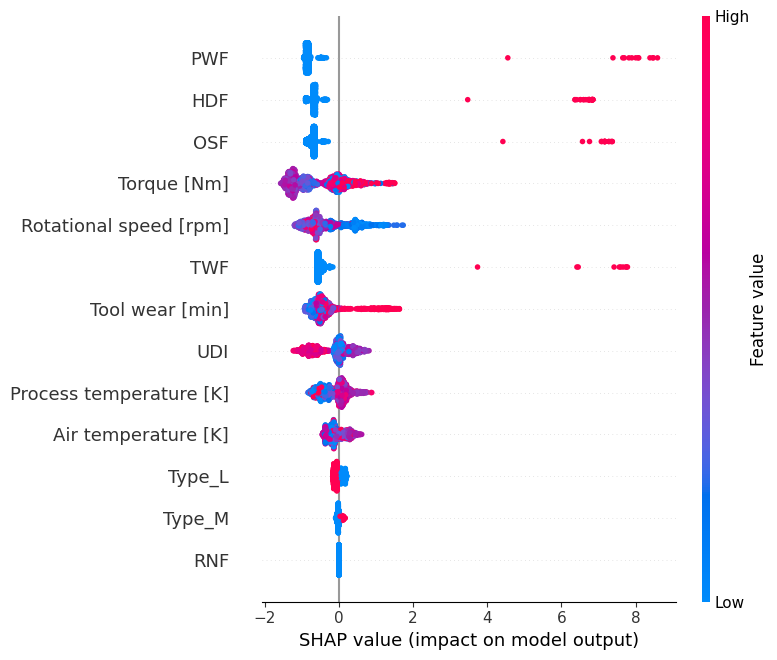

In [35]:
from xgboost import XGBClassifier
import shap

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
